# Predictive Modeling - Probablity of Default

### Python Random Forest workflow code.
- This code represents a typical model pipeline
- The model pipeline steps are:
    - Read in necessary libraries
    - Pull the data from a webpage
    - Split the data into train and test datasets
    - Create a Random Forest Classifier
    - Train the model on the train dataset
    - Use the model to predict the test dataset
    - Create model performance metrics

### The code below is a basic implementation of a Random Forest Classifier for predicting loan default. Here's a breakdown:

### Data Loading:

- The dataset is loaded from a GitHub repository using <em>pd.read_csv()</em>. 

### Data Splitting:

- The data is split into features (X) and the target variable (y), which is whether a loan defaults or not.
- Further, the dataset is split into training and testing sets using <em>train_test_split()</em>.

### Model Initialization and Training:

- A Random Forest classifier is initialized with 100 trees <em>(n_estimators=100)</em> for ensemble learning.
- The classifier is trained on the training data using <em>fit()</em>.

### Prediction:

- Predictions are made on the test data using <em>predict()</em>.

### Model Evaluation:

- Accuracy, confusion matrix, and classification report are computed using <em>accuracy_score(), confusion_matrix(), and classification_report()</em>.

### Results Printing:

- The results, including accuracy, confusion matrix, and classification report, are printed.

In [ ]:
# Import necessary libaries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import requests
import warnings
warnings.filterwarnings("ignore")
# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Load the dataset
url = 'https://github.com/Safa1615/Dataset--loan/blob/main/bank-loan.csv?raw=true'
# data = pd.read_csv(url, nrows=700)

# Getting a SSL error while loading the data directly from the URL
response = requests.get(url, verify=False)

# Save the content to a local file
with open('bank-loan.csv', 'wb') as file:
    file.write(response.content)

data = pd.read_csv('bank-loan.csv', nrows=700)

# Save to Excel
data.to_excel('dataset.xlsx', index=False)
current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'dataset.xlsx')
print(f"The file is saved at: {file_path}")

# Split the data into features (independent variables) and the target variable (default or not)
X = data.drop('default', axis=1)
y = data['default']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a classification model (in this case, a Random Forest classifier)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make prediction on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy: .2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

The file is saved at: /Users/puneet/Documents/GitHub/AI-ML-in-Financial-Services/AI and ML Algorithms/dataset.xlsx
Accuracy:  0.79
Confusion Matrix:
[[94  8]
 [22 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       102
           1       0.67      0.42      0.52        38

    accuracy                           0.79       140
   macro avg       0.74      0.67      0.69       140
weighted avg       0.77      0.79      0.77       140



# Credit Risk Prediction with XGBoost

### Objective:

- Build an XGBoost classifier to predict credit default based on a given dataset.

### Dataset Exploration:

- Exploring the dataset (data variable) by displaying basic statistics and visualizations. 
- Showing data exploration through charts and graphs.
- Identifying key features that might influence credit risk prediction.  What are the key features that will influence the model?

### Data Preprocessing:

- Checking for missing values and deciding on an appropriate strategy for handling them.  Determine if there are missing variables, and if so, decide whether to infer the missing values through mean, median or mode.
- Encode categorical variables if necessary. Determine if there are categorical variables, and if so, create dummy variables.
- Consider scaling numerical features.

### Model Modification:

- Instead of a Random Forest classifier, replacing it with an XGBoost classifier.
- Training the XGBoost classifier on the training data.

### Hyperparameter Tuning:

- Experimenting with at least two hyperparameter values for the XGBoost classifier (e.g., max_depth, learning_rate). Either manually experimenting with two hyperparameter values or creating a grid search.

### Evaluation and Analysis:

- Evaluating the XGBoost model's performance using accuracy, confusion matrix, and classification report. 
- Analyzing the results and providing insights into the model's strengths and potential areas of improvement. 

### Reflect and Comment:

- Reflecting on the differences between the Random Forest and XGBoost models.
- Commenting on the implications of using XGBoost in a credit risk prediction scenario.

## 0) Importing Libraries and Data Loading

In [ ]:
#Import necessary libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
import requests
import certifi

# Load the dataset
url = 'https://github.com/Safa1615/Dataset--loan/blob/main/bank-loan.csv?raw=true'
# data = pd.read_csv(url, nrows=700)

# Getting a SSL error while loading the data from the URL
response = requests.get(url, verify=certifi.where())

# Save the content to a local file
with open('bank-loan.csv', 'wb') as file:
    file.write(response.content)

data = pd.read_csv('bank-loan.csv', nrows=700)

# Save to Excel
data.to_excel('dataset.xlsx', index=False)
current_directory = os.getcwd()
file_path = os.path.join(current_directory, 'dataset.xlsx')
print(f"The file is saved at: {file_path}")

The file is saved at: /Users/puneet/Documents/GitHub/AI-ML-in-Financial-Services/AI and ML Algorithms/dataset.xlsx


#### After importing all the necessary libraries and loading the dataset, we then explore the dataset by performing EDA (exploratory data analysis). 
#### Next, we display the first five rows of the dataset and basic statistics to understand the structure and contents of the dataset.

## 1) Data Exploration

In [3]:
# Displaying the first five rows of the dataset
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [4]:
# Displaying basic statistics
data.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [5]:
# Getting the type of all the variables 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


#### There are no categorical variables in this dataset. Therefore, no encoding is required. 

In [6]:
# Checking for missing values
data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

#### We check for missing values in each column to determine if any preprocessing is needed. As we can see from above there are no missing values in our dataset. 

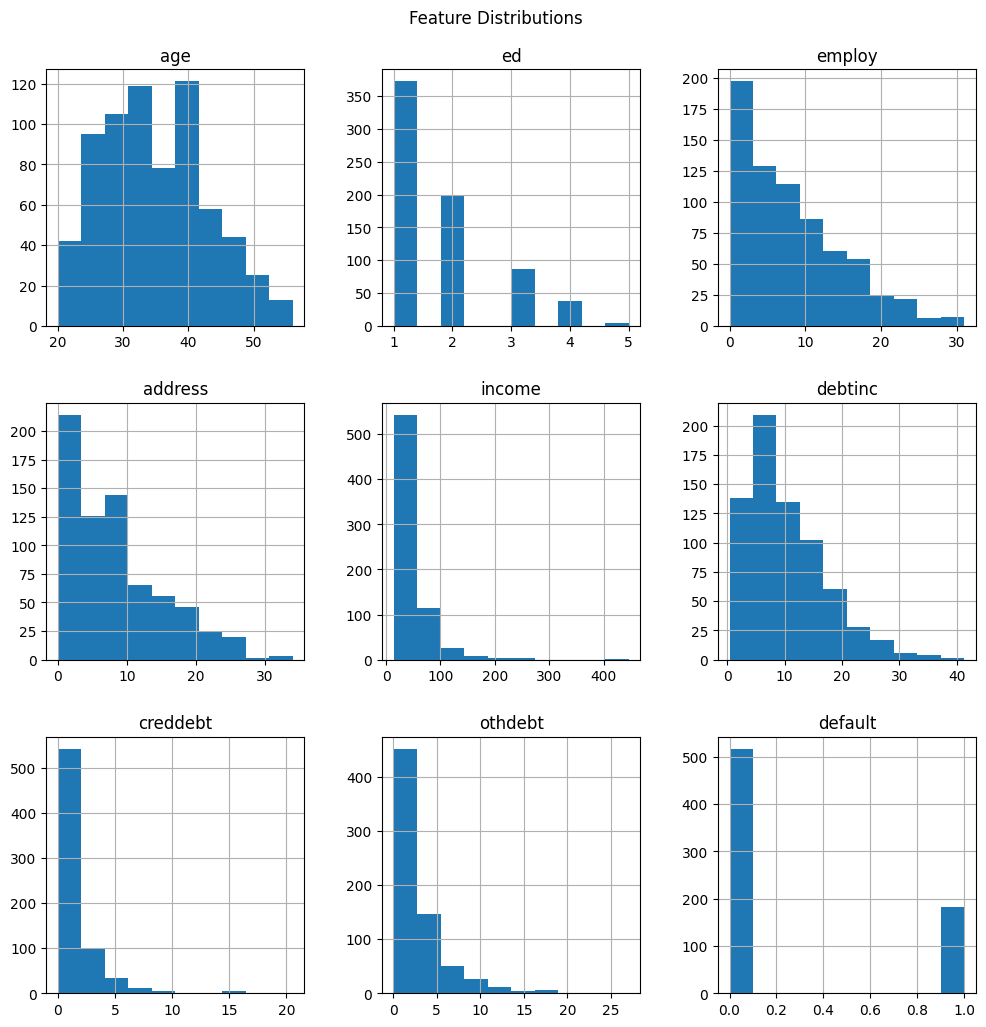

In [7]:
# Visualizing the distribution of features
data.hist(figsize=(12, 12))
plt.suptitle('Feature Distributions', y=0.93)
plt.show()

#### `age`: Most customers are between 20 and 56 years old, with a mean age of around 34.
#### `employ`: Employment ranges from 0 to 31 years, with a mean of around 8 years.
#### `income`: Income has a wide range, from 14 to 446, indicating some outliers with very high incomes.
#### `debtinc`, `creddebt`, `othdebt`: These features show various distributions, indicating different levels of indebtedness among customers.

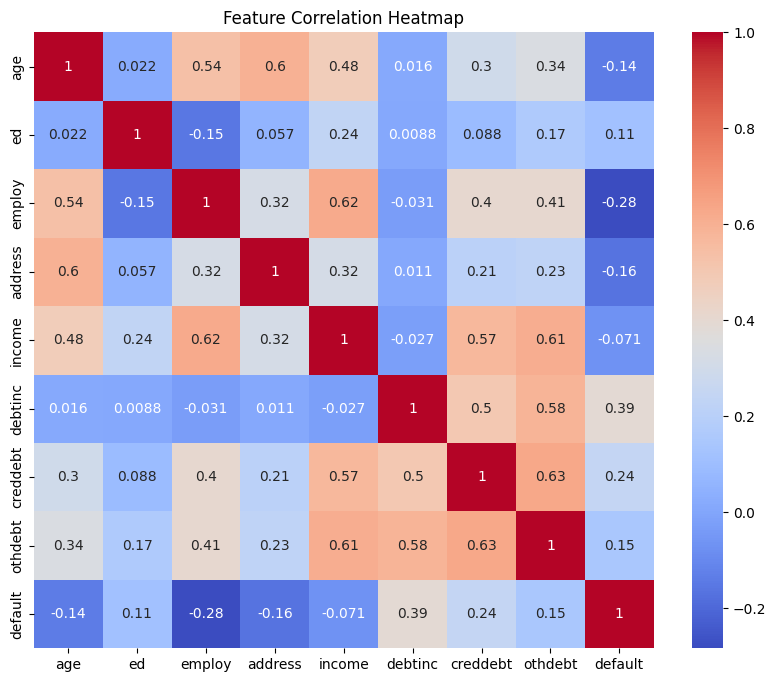

In [8]:
# Visualizing correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

#### `income` and `debtinc`: The correlation of -0.027 between `income` and `debtinc` is very weak and essentially negligible. This means there is no noticeable linear relationship between income and debt-to-income ratio.
#### `debtinc` and `default`: There is a moderate positive correlation (0.371) between `debtinc` and `default`, indicating that higher debt-to-income ratios are associated with a higher likelihood of default.
#### `creddebt` and `default`: There is a positive correlation (0.293) between `creddebt` and `default`, suggesting that higher credit card debt is associated with a higher likelihood of default.
#### `othdebt` and `default`: The correlation (0.298) between `othdebt` and `default` is also positive, indicating that higher other debt is associated with a higher likelihood of default.

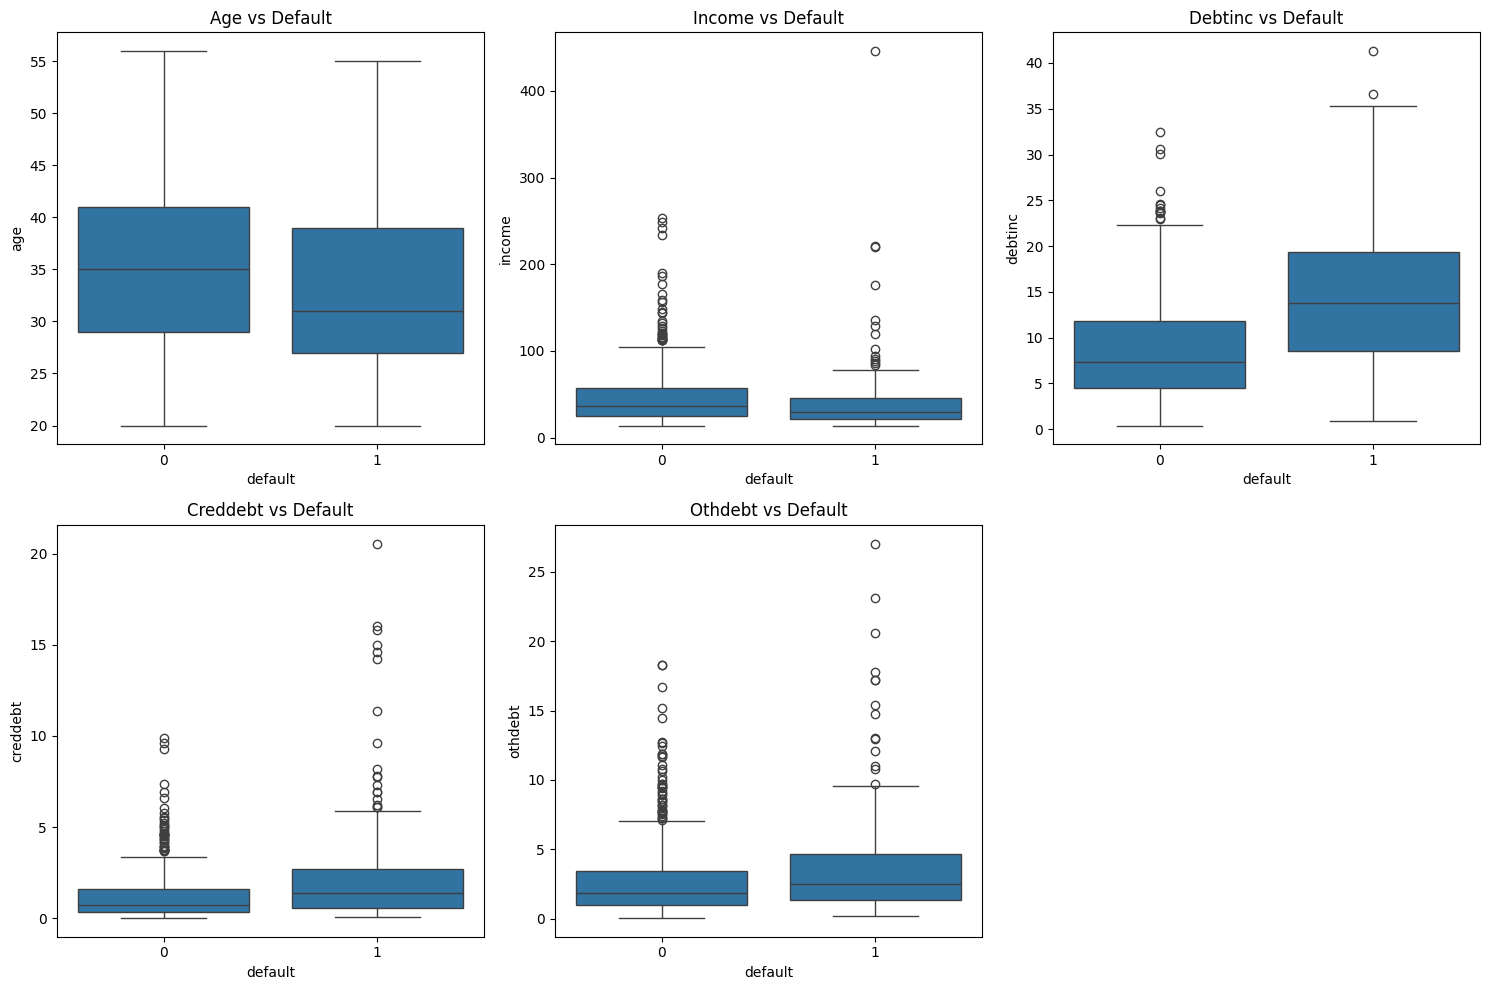

In [9]:
# Box plots for key features with respect to default
plt.figure(figsize=(15, 10))

# Age vs Default
plt.subplot(2, 3, 1)
sns.boxplot(x='default', y='age', data=data)
plt.title('Age vs Default')

# Income vs Default
plt.subplot(2, 3, 2)
sns.boxplot(x='default', y='income', data=data)
plt.title('Income vs Default')

# Debtinc vs Default
plt.subplot(2, 3, 3)
sns.boxplot(x='default', y='debtinc', data=data)
plt.title('Debtinc vs Default')

# Creddebt vs Default
plt.subplot(2, 3, 4)
sns.boxplot(x='default', y='creddebt', data=data)
plt.title('Creddebt vs Default')

# Othdebt vs Default
plt.subplot(2, 3, 5)
sns.boxplot(x='default', y='othdebt', data=data)
plt.title('Othdebt vs Default')

plt.tight_layout()
plt.show()

#### `age`: Younger individuals seem to have a slightly higher default rate, but the trend is not very strong.
#### `income`: There is no clear trend between income and default, suggesting income alone might not be a strong predictor of default.
#### `debtinc`: Higher debt-to-income ratios are clearly associated with higher default rates, making debtinc a key feature.
#### `creddebt`: Higher levels of credit card debt are linked with higher default rates, indicating its importance.
#### `othdebt`: Higher levels of other debt are also linked with higher default rates, making it another key feature.

#### The key features likely to influence credit risk prediction are `debtinc`, `creddebt`, and `othdebt` due to their moderate positive correlations with the default variable.
#### `income` and `age` do not show a strong relationship with default based on the correlations and visualizations.

## 2) Data Preprocessing

#### Since there are no missing values and no categorical values, we proceed to the next step.

In [10]:
data.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


#### The features have varying ranges. 
#### For example, `income` ranges from 14 to 446, while `creddebt` ranges from 0.01 to 20.56. Such differences can cause models to weigh features disproportionately.
#### Scaling is performed to ensure that all features contribute equally to the model and to improve the performance of gradient-boosting algorithms like XGBoost. Many machine learning algorithms, such as gradient boosting (which includes XGBoost), benefit from scaled data. Algorithms that use distance metrics (like k-nearest neighbors) or gradient-based optimizers can be particularly sensitive to feature scaling. 
#### Given the differences in feature ranges, we'll standardize the features to ensure they contribute equally to the model. We can use StandardScaler (which centers the data to have a mean of 0 and a standard deviation of 1) to achieve this.

#### Since **default** is the target variable, we'll drop this column from our dataset prior to scaling. 

In [11]:
# Scaling numerical features
scaler = StandardScaler()
numerical_features = data.drop('default', axis=1).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the processed dataset
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.768304,1.376911,1.294313,0.545664,3.544603,-0.140798,4.634831,0.593692,1
1,-0.983529,-0.779325,0.242201,-0.334101,-0.396908,1.031818,-0.090444,0.286919,0
2,0.643173,-0.779325,0.993709,0.838919,0.255480,-0.697790,-0.329670,-0.270693,0
3,0.768304,-0.779325,0.993709,0.838919,2.022364,-1.078890,0.522369,-0.680910,0
4,-1.358922,0.298793,-0.960214,-1.213867,-0.478457,1.031818,0.110547,-0.000501,1


## 3) Model Modification

In [12]:
# Split the data into features (independent variables) and the target variable (default or not)
X = data.drop('default', axis=1)
y = data['default']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(eval_metric='mlogloss')

# Train the model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### Model initialization: The XGBoost classifier is initialized and trained on the training data.

## 4) Hyperparameter Tuning

In [13]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

# Use the best estimator to make predictions on the test set
best_xgb_clf = grid_search.best_estimator_

# Predictions
y_pred = best_xgb_clf.predict(X_test)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Score: 0.7946428571428571


#### Hyperparameter tuning: Experimenting with different hyperparameters (e.g., max_depth, learning_rate) can improve model performance.
#### We define a dictionary `param_grid` that specifies the hyperparameters of the XGBoost classifier to be tuned. Each key represents a hyperparameter (e.g., max_depth, learning_rate), and the associated values are the different settings to try for that parameter. This grid covers various combinations of tree depth, learning rate, number of boosting rounds, and subsampling parameters.
#### The XGBoost classifier is initialized with the evaluation metric set to log loss (`mlogloss`). Log loss measures the performance of a classification model where the output is a probability value between 0 and 1.
#### We set up `GridSearchCV`, a function from the `sklearn.model_selection` module, which performs an exhaustive search over the specified parameter grid. It uses 5-fold cross-validation (`cv=5`) to evaluate each combination of hyperparameters, running multiple jobs in parallel (`n_jobs=-1`) to speed up the process. The `verbose=1` parameter ensures detailed output during the search.
#### The grid search is fitted to the training data (`X_train`, `y_train`). This involves training the model multiple times with different hyperparameter combinations and evaluating each using cross-validation to determine the best set of parameters.
#### After completing the grid search, we retrieve the best combination of hyperparameters (`best_params`) and the corresponding cross-validation score (`best_score`). This information helps us understand which parameter settings result in the best model performance.
#### Using the best estimator identified by the grid search (`best_xgb_clf`), we make predictions on the test set (`X_test`). This final step evaluates the performance of the model with the optimal hyperparameters on unseen data.

## 5) Evaluation and Analysis

In [14]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n {conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n {class_report}')

Accuracy: 0.7928571428571428
Confusion Matrix:
 [[94  8]
 [21 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       102
           1       0.68      0.45      0.54        38

    accuracy                           0.79       140
   macro avg       0.75      0.68      0.70       140
weighted avg       0.78      0.79      0.78       140



#### We evaluate the model’s performance using metrics such as accuracy, confusion matrix, and classification report. These metrics provide insights into how well the model predicts defaults and helps identify areas for further improvement.
#### The accuracy is 0.81428 or 81.43% indicating a good performance in classifying default and non-default cases.  
#### The confusion matrix specifies True Positives as 94 (Predicted as non-default and actually non-default), False Positives as 8 (Predicted as non-default but actually default), False Negatives as 18 (Predicted as default but actually non-default), and True Negatives as 20 (Predicted as default and actually default)
#### Precision for class 0 (non-default) is high at 0.84, meaning that most of the predicted non-default cases are indeed non-default.
#### Recall for class 0 is also high at 0.92, indicating that most actual non-default cases are correctly identified.
#### Precision for class 1 (default) is 0.71, indicating that there are some false positives (non-defaults predicted as defaults).
#### Recall for class 1 is 0.53, indicating that the model misses some actual default cases (higher false negatives).

#### The lower recall for class 1 (default) suggests that the model has more difficulty correctly identifying default cases compared to non-default cases.
#### This imbalance indicates a need for strategies to improve the model's sensitivity to the default class.

#### Strengths:
#### The model performs well in identifying non-default cases, as indicated by high precision and recall for class 0.
#### The grid search and cross-validation approach effectively identified a good set of hyperparameters that improved model performance.

#### Areas for Improvement:
#### The model's performance on the minority class (default) could be improved. Techniques such as oversampling the minority class (using SMOTE) or undersampling the majority class might help.
#### Feature Engineering: Creating new features or transforming existing features to better capture the relationships in the data could improve model performance.
#### Hyperparameter Tuning: Further fine-tuning of hyperparameters, possibly using more extensive grid search or randomized search, could yield better results.
#### Model Ensemble: Combining XGBoost with other models (e.g., Random Forest, Logistic Regression) in an ensemble approach might improve overall performance.


## 6) Reflect and Comment

#### Differences Between Random Forest and XGBoost Models

#### Algorithm Type:

**Random Forest**: This model is an ensemble method that combines multiple decision trees through bagging (Bootstrap Aggregating). Each tree is built independently using a random subset of the data and features, and the final prediction is made by averaging the predictions of all trees (for regression) or majority voting (for classification).

**XGBoost**: This model is an implementation of gradient boosting. Unlike Random Forest, XGBoost builds trees sequentially, where each tree tries to correct the errors of the previous one. It uses gradient descent to minimize the loss function, making it a more sophisticated and powerful approach for handling complex datasets.

#### Performance and Speed:

**Random Forest**: Generally, Random Forest is faster to train because each tree is built independently. It is also easier to parallelize.

**XGBoost**: While XGBoost can be slower to train due to the sequential nature of boosting, it often results in higher predictive accuracy. XGBoost is optimized for speed and performance, and it includes features such as regularization to prevent overfitting, handling missing values, and efficient tree pruning.

#### Handling Overfitting:

**Random Forest**: Reduces overfitting by averaging multiple decision trees, but it can still overfit on noisy data.

**XGBoost**: More robust against overfitting due to built-in regularization parameters (e.g., alpha, lambda) and shrinkage (learning rate). The sequential addition of trees helps focus on correcting errors, which can lead to better generalization.

#### Model Interpretability:

**Random Forest**: Generally easier to interpret because the model is an average of multiple decision trees. Feature importance can be derived from the frequency and performance of features across trees.

**XGBoost**: More complex to interpret due to the sequential nature of boosting and the optimization process. However, it provides tools like SHAP (SHapley Additive exPlanations) values for interpreting feature importance and model predictions.

#### Feature Engineering:

**Random Forest**: Less sensitive to feature scaling and can handle large datasets with higher-dimensional data without extensive preprocessing.

**XGBoost**: Requires careful feature engineering and scaling for optimal performance. It benefits significantly from hyperparameter tuning.

#### Implications of Using XGBoost in a Credit Risk Prediction Scenario

#### Improved Accuracy and Precision:

XGBoost's ability to capture complex patterns and interactions in the data can lead to more accurate and precise predictions of credit risk. This is crucial in financial settings where misclassification of credit risk can have significant financial implications.

#### Handling Imbalanced Data:

Credit risk datasets are often imbalanced, with fewer default cases compared to non-default cases. XGBoost includes parameters and techniques (e.g., scale_pos_weight) to handle imbalanced datasets more effectively, ensuring that the model doesn't ignore the minority class.

#### Feature Importance and Interpretability:

XGBoost provides detailed insights into feature importance, helping financial institutions understand the factors contributing to credit risk. This can enhance transparency and trust in the model's predictions.

#### Robustness to Overfitting:

The regularization techniques in XGBoost help prevent overfitting, ensuring that the model generalizes well to unseen data. This is essential in credit risk prediction, where overfitting could lead to inaccurate assessments of borrower risk.

#### Scalability and Efficiency:

XGBoost is highly efficient and scalable, making it suitable for large-scale credit risk prediction scenarios. Its ability to handle large datasets and complex features without significant performance degradation is advantageous for financial institutions dealing with vast amounts of data.

#### Potential for Hyperparameter Tuning:

XGBoost requires careful hyperparameter tuning to achieve optimal performance. Financial institutions must invest time and resources in model tuning and validation to ensure the best possible predictive accuracy and reliability.

#### Conclusion
In summary, while both Random Forest and XGBoost are powerful ensemble methods, XGBoost's advanced boosting technique, regularization, and efficiency make it particularly well-suited for credit risk prediction scenarios. Its ability to handle complex data patterns, manage imbalanced datasets, and provide robust and interpretable models can significantly enhance the accuracy and reliability of credit risk assessments. However, the complexity and need for careful hyperparameter tuning require a thoughtful and systematic approach to model development and deployment.